In [1]:
import json

# 第一步：提取 AAT.json 文件中的 answers 和 questions
aat_file_path = r"./【AiDLab】A100/AAT/label/AAT.json"

aat_answers = []
aat_questions = []

with open(aat_file_path, 'r') as f:
    data = json.load(f)

for item in data:
    aat_answers.extend(item.get('answers', []))
    aat_questions.extend(item.get('question', []))

# 打印 AAT.json 文件中的 answers 和 questions 标签
print("从 AAT.json 提取到的标签：")
print(f"总共提取到 {len(aat_answers)} 个 answers 标签。")
print(f"总共提取到 {len(aat_questions)} 个 questions 标签。\n")

print("提取到的所有 answers 标签：")
for answer in aat_answers:
    print(f"  - {answer}")

print("\n提取到的所有 questions 标签：")
for question in aat_questions:
    print(f"  - {question}")

print("\n" + "="*50 + "\n")

# 第二步：提取 LAT.json 文件中的 answers 和 questions
lat_file_path = r"./【AiDLab】A100/LAT/label/LAT.json"

lat_answers = []
lat_questions = []

with open(lat_file_path, 'r') as f:
    data = json.load(f)

for item in data:
    lat_answers.extend(item.get('answers', []))
    lat_questions.extend(item.get('question', []))

# 打印 LAT.json 文件中的 answers 和 questions 标签
print("从 LAT.json 提取到的标签：")
print(f"总共提取到 {len(lat_answers)} 个 answers 标签。")
print(f"总共提取到 {len(lat_questions)} 个 questions 标签。\n")

print("提取到的所有 answers 标签：")
for answer in lat_answers:
    print(f"  - {answer}")

print("\n提取到的所有 questions 标签：")
for question in lat_questions:
    print(f"  - {question}")

print("\n" + "="*50 + "\n")


从 AAT.json 提取到的标签：
总共提取到 500 个 answers 标签。
总共提取到 483 个 questions 标签。

提取到的所有 answers 标签：
  - Shoes/Heels_001A03
  - Shoes/Heels_001A01
  - Shoes/Heels_001A02
  - Shoes/Heels_001A04
  - Shoes/Heels_001A10
  - Bags/Shoulder_002A10
  - Bags/Shoulder_002A02
  - Bags/Shoulder_002A01
  - Bags/Shoulder_002A03
  - Bags/Shoulder_002A04
  - Clothings/Tops_003A01
  - Clothings/Tops_003A02
  - Clothings/Tops_003A10
  - Clothings/Tops_003A03
  - Clothings/Tops_003A04
  - Shoes/Mules_004A02
  - Shoes/Mules_004A10
  - Shoes/Mules_004A01
  - Shoes/Mules_004A03
  - Shoes/Mules_004A04
  - Clothings/Tops_005A01
  - Clothings/Tops_005A02
  - Clothings/Tops_005A10
  - Clothings/Tops_005A03
  - Clothings/Tops_005A04
  - Accessories/Earrings_006A10
  - Accessories/Earrings_006A01
  - Accessories/Earrings_006A04
  - Accessories/Earrings_006A03
  - Accessories/Earrings_006A02
  - Shoes/Sandals_007A02
  - Shoes/Sandals_007A01
  - Shoes/Sandals_007A04
  - Shoes/Sandals_007A03
  - Shoes/Sandals_007A10
  - Shoes/B

In [4]:
import json
import re

# 正则表达式提取 AAT 和 LAT 格式的编号
pattern_aat = re.compile(r'(\d{3}[A-Z]\d{2})')  # AAT 格式，例如 "001A01"
pattern_lat = re.compile(r'P\d{7,9}')            # LAT 格式，例如 "P00447524"，7 到 9 位数字

# 用于存储文件名与标签的字典
filename_to_label_aat = {}
filename_to_label_lat = {}

# 第一步：提取 AAT.json 文件
aat_file_path = r"./【AiDLab】A100/AAT/label/AAT.json"

with open(aat_file_path, 'r') as f:
    data = json.load(f)

# 处理 AAT 文件
for item in data:
    answers = item.get('answers', [])
    questions = item.get('question', [])

    # 合并 answers 和 questions 标签
    for label in answers + questions:
        # 匹配 AAT 格式编号
        match_aat = pattern_aat.search(label)
        if match_aat:
            file_id = match_aat.group(1)  # 提取编号部分，例如 "001A01"
            filename_to_label_aat[file_id] = label  # 将编号映射到标签

# 打印 AAT.json 文件中的结果
print(f"AAT.json 文件中提取到的标签个数: {len(filename_to_label_aat)}\n")
for filename, label in filename_to_label_aat.items():
    print(f"{filename}.jpg: {label}")

print("\n" + "=" * 50 + "\n")

# 第二步：提取 LAT.json 文件
lat_file_path = r"./【AiDLab】A100/LAT/label/LAT.json"

with open(lat_file_path, 'r') as f:
    data = json.load(f)

# 处理 LAT 文件
for item in data:
    answers = item.get('answers', [])
    questions = item.get('question', [])

    # 合并 answers 和 questions 标签
    for label in answers + questions:
        # 匹配 LAT 格式编号
        match_lat = pattern_lat.search(label)
        if match_lat:
            file_id = match_lat.group(0)  # 提取编号部分，例如 "P00447524"
            filename_to_label_lat[file_id] = label  # 将编号映射到标签

# 打印 LAT.json 文件中的结果
print(f"LAT.json 文件中提取到的标签个数: {len(filename_to_label_lat)}\n")
for filename, label in filename_to_label_lat.items():
    print(f"{filename}.jpg: {label}")

print("\n" + "=" * 50 + "\n")


AAT.json 文件中提取到的标签个数: 983

001A03.jpg: Shoes/Heels_001A03
001A01.jpg: Shoes/Heels_001A01
001A02.jpg: Shoes/Heels_001A02
001A04.jpg: Shoes/Heels_001A04
001A10.jpg: Shoes/Heels_001A10
001Q01.jpg: Clothings/Outwear_001Q01
001Q02.jpg: Clothings/Dresses_001Q02
001Q03.jpg: Bags/CrossBody_001Q03
001Q04.jpg: Accessories/Watches_001Q04
001Q05.jpg: Accessories/Earrings_001Q05
002A10.jpg: Bags/Shoulder_002A10
002A02.jpg: Bags/Shoulder_002A02
002A01.jpg: Bags/Shoulder_002A01
002A03.jpg: Bags/Shoulder_002A03
002A04.jpg: Bags/Shoulder_002A04
002Q01.jpg: Clothings/Outwear_002Q01
002Q02.jpg: Clothings/Dresses_002Q02
002Q03.jpg: Shoes/Heels_002Q03
002Q04.jpg: Accessories/Earrings_002Q04
002Q05.jpg: Accessories/Necklaces_002Q05
003A01.jpg: Clothings/Tops_003A01
003A02.jpg: Clothings/Tops_003A02
003A10.jpg: Clothings/Tops_003A10
003A03.jpg: Clothings/Tops_003A03
003A04.jpg: Clothings/Tops_003A04
003Q01.jpg: Clothings/Outwear_003Q01
003Q02.jpg: Clothings/Trousers_003Q02
003Q03.jpg: Bags/TopHandle_003Q03
0

标注：aat数据集的正则表达式中间不仅仅是A，还有数字Q，因此要修改正则表达式的表达，而对于LAT的数据集，标签在label.josn中有重复出现的情况，导致数据预处理出现了一些问题，但是也通过用列表提取的对比方法找到了问题所在。这些可以放在报告中

In [7]:
from collections import defaultdict

filename_to_label_lat = defaultdict(list)

# 处理 LAT 文件
for item in data:
    answers = item.get('answers', [])
    questions = item.get('question', [])

    for label in answers + questions:
        match_lat = pattern_lat.search(label)
        if match_lat:
            file_id = match_lat.group(0)
            filename_to_label_lat[file_id].append(label)

# 查找并打印重复的标签
print("重复的标签列表：\n")
duplicates_found = False
for filename, labels in filename_to_label_lat.items():
    if len(labels) > 1:
        duplicates_found = True
        print(f"{filename}.jpg:")
        for label in labels:
            print(f"  - {label}")
        print()

if not duplicates_found:
    print("未找到重复的标签。")

# 打印 LAT.json 文件中的标签总数
print(f"\nLAT.json 文件中提取到的标签总数: {sum(len(v) for v in filename_to_label_lat.values())}")


重复的标签列表：

P00278730.jpg:
  - Top_P00278730
  - Top_P00278730
  - Top_P00278730
  - Top_P00278730
  - Top_P00278730

P00447042.jpg:
  - Shoes_P00447042
  - Shoes_P00447042

P00425745.jpg:
  - Bags_P00425745
  - Bags_P00425745

P00422954.jpg:
  - Top_P00422954
  - Top_P00422954

P00451493.jpg:
  - Shoes_P00451493
  - Shoes_P00451493

P00418750.jpg:
  - Earing_P00418750
  - Earing_P00418750

P00462136.jpg:
  - Outwear_P00462136
  - Outwear_P00462136

P00337091.jpg:
  - Top_P00337091
  - Top_P00337091
  - Top_P00337091
  - Top_P00337091

P00470549.jpg:
  - Outwear_P00470549
  - Outwear_P00470549

P00426237.jpg:
  - Top_P00426237
  - Top_P00426237
  - Top_P00426237

P00447524.jpg:
  - Skirt_P00447524
  - Skirt_P00447524

P00446995.jpg:
  - Watches_P00446995
  - Watches_P00446995

P00418812.jpg:
  - Bracelet_P00418812
  - Bracelet_P00418812

P00466759.jpg:
  - Outwear_P00466759
  - Outwear_P00466759

P00444930.jpg:
  - Skirt_P00444930
  - Skirt_P00444930

P00402446.jpg:
  - Skirt_P00402446
 

In [8]:
import json

# AAT 文件路径
aat_file_path = ("AAT.json", r"./【AiDLab】A100/AAT/label/AAT.json")

# LAT 文件路径
lat_file_path = ("LAT.json", r"./【AiDLab】A100/LAT/label/LAT.json")

# 类别映射字典，将标签映射为四大类
category_mapping = {
    'Shoes': 'shoes',
    'Top': 'clothings',
    'Pants': 'clothings',
    'Skirt': 'clothings',
    'Dress': 'clothings',
    'Outwear': 'clothings',
    'Earing': 'accessories',
    'Bracelet': 'accessories',
    'Watches': 'accessories',
    'Hat': 'accessories',
    'Neckline': 'accessories',
    'Sunglasses': 'accessories',
    'Bags': 'bags'
}

# 用于存储 AAT 和 LAT 数据的主类别集合
aat_main_categories = set()
lat_main_categories = set()

# 加载并提取 AAT 文件的主类别
file_name, file_path = aat_file_path
with open(file_path, 'r') as f:
    data = json.load(f)
    for item in data:
        answers = item.get('answers', [])
        questions = item.get('question', [])
        
        # 合并 answers 和 questions 标签
        for label in answers + questions:
            # 对 AAT 标签格式进行处理，取主类别部分
            main_category = label.split('/')[0].lower()  # 转换为小写
            # 如果主类别存在，将其添加到 AAT 集合中
            if main_category:
                aat_main_categories.add(main_category)

# 加载并提取 LAT 文件的主类别
file_name, file_path = lat_file_path
with open(file_path, 'r') as f:
    data = json.load(f)
    for item in data:
        answers = item.get('answers', [])
        questions = item.get('question', [])
        
        # 合并 answers 和 questions 标签
        for label in answers + questions:
            # 对 LAT 标签格式进行处理，取前缀并通过字典映射
            main_category = label.split('_')[0]
            main_category = category_mapping.get(main_category, None)

            # 如果映射成功，将类别转换为小写
            if main_category:
                main_category = main_category.lower()
                # 如果主类别存在，将其添加到 LAT 集合中
                lat_main_categories.add(main_category)

# 将主类别集合转换为有序列表
aat_labellist = sorted(list(aat_main_categories))
lat_labellist = sorted(list(lat_main_categories))

# 输出 AAT 和 LAT 的主类别种类数和类别名称
print(f"AAT 主类别总数: {len(aat_main_categories)}")
print("AAT 主类别列表:", aat_labellist)

print(f"LAT 主类别总数: {len(lat_main_categories)}")
print("LAT 主类别列表:", lat_labellist)


AAT 主类别总数: 4
AAT 主类别列表: ['accessories', 'bags', 'clothings', 'shoes']
LAT 主类别总数: 4
LAT 主类别列表: ['accessories', 'bags', 'clothings', 'shoes']


这张图片对应的标签是 shoes
总的数据集大小：1830
训练集大小：1098
验证集大小：366
测试集大小：366


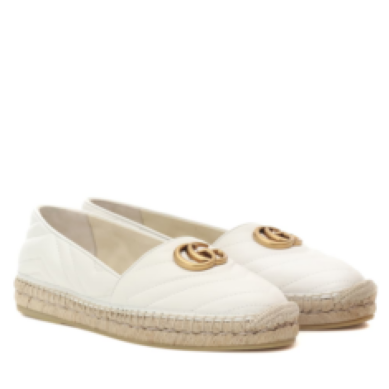

In [25]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import random
import json
import os

# 定义图像转换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor()           # 转换为 Tensor
])

# 统一的类别映射列表，保证 AAT 和 LAT 数据集的一致性
labellist = ['shoes', 'clothings', 'bags', 'accessories']

# 类别映射字典，将 LAT 标签映射到四大类
category_mapping = {
    'Shoes': 'shoes',
    'Top': 'clothings',
    'Pants': 'clothings',
    'Skirt': 'clothings',
    'Dress': 'clothings',
    'Outwear': 'clothings',
    'Earing': 'accessories',
    'Bracelet': 'accessories',
    'Watches': 'accessories',
    'Hat': 'accessories',
    'Neckline': 'accessories',
    'Sunglasses': 'accessories',
    'Bags': 'bags'
}

# 自定义数据集类，包含 AAT 和 LAT 数据集
class FashionDataset(Dataset):
    def __init__(self, images_dirs, json_paths, transform=None):
        self.images_dirs = images_dirs
        self.transform = transform
        self.data = []

        # 加载 AAT 数据
        aat_images_dir, aat_json_path = images_dirs[0], json_paths[0]
        with open(aat_json_path, 'r') as f:
            aat_data = json.load(f)
            for item in aat_data:
                # 提取 answers 和 questions 标签
                labels = item.get('answers', []) + item.get('question', [])
                if not labels:
                    continue
                for label_str in labels:
                    main_category = label_str.split('/')[0].lower()
                    # 如果主类别存在于映射列表，则添加到数据集中
                    if main_category in labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"  # 获取文件名
                        img_path = os.path.join(aat_images_dir, image_id)
                        if os.path.exists(img_path):
                            self.data.append((img_path, main_category))
                        else:
                            print(f"图像文件不存在：{img_path}")

        # 加载 LAT 数据
        lat_images_dir, lat_json_path = images_dirs[1], json_paths[1]
        with open(lat_json_path, 'r') as f:
            lat_data = json.load(f)
            for item in lat_data:
                # 提取 answers 和 questions 标签
                labels = item.get('answers', []) + item.get('question', [])
                if not labels:
                    continue
                for label_str in labels:
                    main_category_key = label_str.split('_')[0]
                    main_category = category_mapping.get(main_category_key, '').lower()
                    # 如果主类别存在于映射列表，则添加到数据集中
                    if main_category in labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"  # 获取文件名
                        img_path = os.path.join(lat_images_dir, image_id)
                        if os.path.exists(img_path):
                            self.data.append((img_path, main_category))
                        else:
                            print(f"图像文件不存在：{img_path}")

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path, main_category = self.data[idx]
        label = labellist.index(main_category)  # 将主类别转为索引

        # 读取图像
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        return image, label

# 数据加载，处理 AAT 和 LAT 文件夹
images_dirs = [
    "./【AiDLab】A100/AAT/image",  # 修改为 AAT 图片文件夹路径
    "./【AiDLab】A100/LAT/image"   # 修改为 LAT 图片文件夹路径
]
json_paths = [
    "./【AiDLab】A100/AAT/label/AAT.json",  # 修改为 AAT JSON 文件路径
    "./【AiDLab】A100/LAT/label/LAT.json"   # 修改为 LAT JSON 文件路径
]
dataset = FashionDataset(images_dirs, json_paths, transform=transform)

# 划分数据集为训练集、验证集和测试集，比例为 6:2:2
total_size = len(dataset)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 创建 DataLoader
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 获取一个批次的数据
image_batch, label_batch = next(iter(trainloader))

# 随机选择一个索引
index = random.randint(0, len(image_batch) - 1)

# 显示图像和标签
imagedemo = image_batch[index]
imagedemolabel = label_batch[index]

# 转换为可显示格式
imagedemo = imagedemo.permute(1, 2, 0)  # 从 (C, H, W) 转换为 (H, W, C)

plt.imshow(imagedemo)
plt.axis('off')  # 关闭坐标轴

print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')
# 打印整个数据集的大小
print(f"总的数据集大小：{len(dataset)}")

# 打印训练集、验证集和测试集的大小
print(f"训练集大小：{len(train_dataset)}")
print(f"验证集大小：{len(val_dataset)}")
print(f"测试集大小：{len(test_dataset)}")


注意这里的1830还是包括lat里面的重复标签

In [10]:
# 获取一个批次的数据
images, labels = next(iter(trainloader))

# 打印图像的形状
print(f"图像的形状: {images.shape}")

# 打印标签的内容
print(f"标签的内容: {labels}")


图像的形状: torch.Size([64, 3, 224, 224])
标签的内容: tensor([2, 0, 2, 3, 1, 3, 2, 3, 1, 3, 3, 2, 0, 2, 3, 3, 2, 2, 0, 2, 2, 0, 0, 1,
        0, 1, 2, 3, 1, 1, 3, 0, 1, 1, 3, 2, 1, 3, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2,
        3, 1, 1, 1, 0, 2, 0, 0, 1, 3, 0, 1, 3, 1, 0, 1])


label = labellist.index(main_category)  # 将主类别转为索引         0123分别对应['shoes', 'clothings', 'bags', 'accessories']

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# 定义模型的函数
def create_model(num_classes):
    model = models.resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)  # 输出层与类别数相同
    return model

# 创建模型
labellist = ['shoes', 'clothings', 'bags', 'accessories']  # 手动定义类别列表
model = create_model(len(labellist))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# 训练循环
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # 计算平均损失
    epoch_loss = running_loss / len(trainloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 验证模型
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # 使用 sklearn 计算准确率
    val_accuracy = accuracy_score(all_labels, all_preds)
    print(f"Validation Accuracy: {val_accuracy:.2f}")

    scheduler.step()

# 保存模型
torch.save(model.state_dict(), 'resnet_fashion_model.pth')
print("Model saved as resnet_fashion_model.pth")

# 测试模型
model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# 使用 sklearn 计算测试集准确率
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy:.2f}")

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/20, Loss: 1.1539
Validation Accuracy: 0.72
Epoch 2/20, Loss: 0.1601
Validation Accuracy: 0.85
Epoch 3/20, Loss: 0.0462
Validation Accuracy: 0.60
Epoch 4/20, Loss: 0.0380
Validation Accuracy: 0.53
Epoch 5/20, Loss: 0.0167
Validation Accuracy: 0.65
Epoch 6/20, Loss: 0.0225
Validation Accuracy: 0.82
Epoch 7/20, Loss: 0.0073
Validation Accuracy: 0.68
Epoch 8/20, Loss: 0.0112
Validation Accuracy: 0.72
Epoch 9/20, Loss: 0.0044
Validation Accuracy: 0.82
Epoch 10/20, Loss: 0.0077
Validation Accuracy: 0.85
Epoch 11/20, Loss: 0.0022
Validation Accuracy: 0.85
Epoch 12/20, Loss: 0.0016
Validation Accuracy: 0.90
Epoch 13/20, Loss: 0.0037
Validation Accuracy: 0.90
Epoch 14/20, Loss: 0.0028
Validation Accuracy: 0.93
Epoch 15/20, Loss: 0.0009
Validation Accuracy: 0.90
Epoch 16/20, Loss: 0.0017
Validation Accuracy: 0.90
Epoch 17/20, Loss: 0.0009
Validation Accuracy: 0.90
Epoch 18/20, Loss: 0.0010
Validation Accuracy: 0.90
Epoch 19/20, Loss: 0.0011
Validation Accuracy: 0.90
Epoch 20/20, Loss: 0.

学习率调度：使用了 ReduceLROnPlateau 学习率调度器，根据验证损失自动调整学习率
optimizer = optim.Adam(model.parameters(), lr=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)


In [ ]:
超参数调优：尝试调整超参数，如学习率、批量大小、优化器等，使用网格搜索或随机搜索寻找最佳参数。

使用更先进的模型：如 EfficientNet、DenseNet 等，这些模型在图像分类任务上表现出色。

In [28]:
print(f"Using device: {device}")
print(f"CUDA available: {torch.cuda.is_available()}")


Using device: cuda
CUDA available: True


数据集总大小: 1663
Epoch 1/50
--------


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


train Loss: 1.1431 Acc: 0.5236
val Loss: 0.8038 Acc: 0.7831
Epoch 2/50
--------
train Loss: 0.6382 Acc: 0.8536
val Loss: 0.5464 Acc: 0.8283
Epoch 3/50
--------
train Loss: 0.4656 Acc: 0.8806
val Loss: 0.3969 Acc: 0.8795
Epoch 4/50
--------
train Loss: 0.3602 Acc: 0.9047
val Loss: 0.3224 Acc: 0.8886
Epoch 5/50
--------
train Loss: 0.2944 Acc: 0.9278
val Loss: 0.2734 Acc: 0.9096
Epoch 6/50
--------
train Loss: 0.2530 Acc: 0.9278
val Loss: 0.2569 Acc: 0.9157
Epoch 7/50
--------
train Loss: 0.2184 Acc: 0.9408
val Loss: 0.2375 Acc: 0.9217
Epoch 8/50
--------
train Loss: 0.1857 Acc: 0.9509
val Loss: 0.2062 Acc: 0.9428
Epoch 9/50
--------
train Loss: 0.1657 Acc: 0.9569
val Loss: 0.2049 Acc: 0.9367
Epoch 10/50
--------
train Loss: 0.1651 Acc: 0.9639
val Loss: 0.1760 Acc: 0.9458
Epoch 11/50
--------
train Loss: 0.1247 Acc: 0.9679
val Loss: 0.1872 Acc: 0.9428
Epoch 12/50
--------
train Loss: 0.1165 Acc: 0.9749
val Loss: 0.1598 Acc: 0.9518
Epoch 13/50
--------
train Loss: 0.1056 Acc: 0.9759
val L

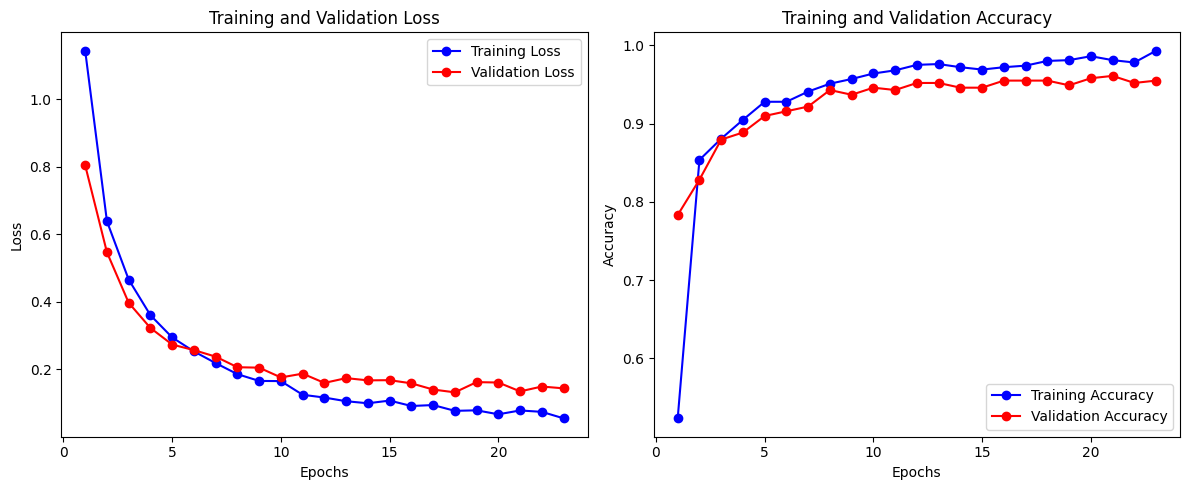

Test Accuracy: 0.9371
Classification Report:
              precision    recall  f1-score   support

       shoes       0.94      0.98      0.96        52
   clothings       0.92      0.96      0.94       128
        bags       0.98      0.88      0.92        56
 accessories       0.94      0.92      0.93        98

    accuracy                           0.94       334
   macro avg       0.94      0.93      0.94       334
weighted avg       0.94      0.94      0.94       334



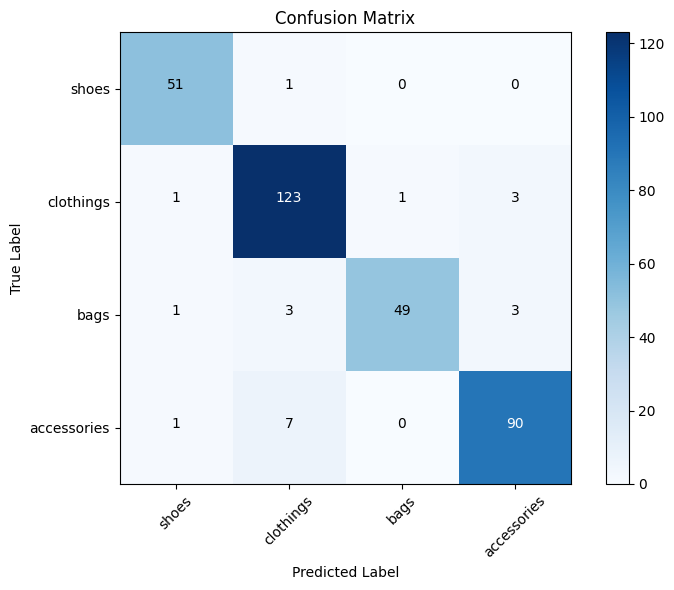

随机选择的图像路径是：./【AiDLab】A100/AAT/image\072Q03.jpg


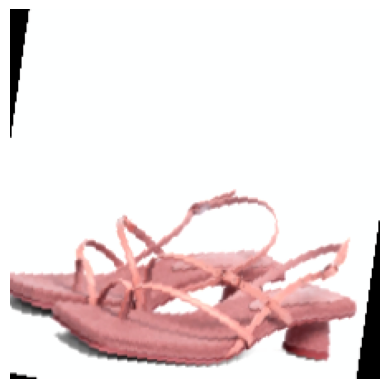

预测的类别是：shoes
真实的类别是：shoes


In [29]:
import json
from PIL import Image
import os
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch.optim.lr_scheduler import ReduceLROnPlateau
import random

class FashionDataset(Dataset):
    def __init__(self, images_dirs, json_paths, transform=None):
        self.images_dirs = images_dirs
        self.transform = transform
        self.data = []

        # 统一的类别映射列表，确保 AAT 和 LAT 数据集之间的一致性
        self.labellist = ['shoes', 'clothings', 'bags', 'accessories']

        # LAT 标签到四大类的类别映射字典
        category_mapping = {
            'Shoes': 'shoes',
            'Top': 'clothings',
            'Pants': 'clothings',
            'Skirt': 'clothings',
            'Dress': 'clothings',
            'Outwear': 'clothings',
            'Earing': 'accessories',
            'Bracelet': 'accessories',
            'Watches': 'accessories',
            'Hat': 'accessories',
            'Neckline': 'accessories',
            'Sunglasses': 'accessories',
            'Bags': 'bags'
        }

        # 用于避免重复数据
        self.data_set = set()

        # 加载 AAT 数据
        aat_images_dir, aat_json_path = images_dirs[0], json_paths[0]
        with open(aat_json_path, 'r') as f:
            aat_data = json.load(f)
            for item in aat_data:
                # 提取 answers 和 questions 标签
                labels = item.get('answers', []) + item.get('question', [])
                if not labels:
                    continue
                for label_str in labels:
                    main_category = label_str.split('/')[0].lower()
                    # 如果主类别在映射列表中，则添加到数据集中
                    if main_category in self.labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"  # 获取文件名
                        img_path = os.path.join(aat_images_dir, image_id)
                        key = (img_path, main_category)
                        if key not in self.data_set and os.path.exists(img_path):
                            self.data.append((img_path, main_category))
                            self.data_set.add(key)

        # 加载 LAT 数据
        lat_images_dir, lat_json_path = images_dirs[1], json_paths[1]
        with open(lat_json_path, 'r') as f:
            lat_data = json.load(f)
            for item in lat_data:
                # 提取 answers 和 questions 标签
                labels = item.get('answers', []) + item.get('question', [])
                if not labels:
                    continue
                for label_str in labels:
                    main_category_key = label_str.split('_')[0]
                    main_category = category_mapping.get(main_category_key, '').lower()
                    # 如果主类别在映射列表中，则添加到数据集中
                    if main_category in self.labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"  # 获取文件名
                        img_path = os.path.join(lat_images_dir, image_id)
                        key = (img_path, main_category)
                        if key not in self.data_set and os.path.exists(img_path):
                            self.data.append((img_path, main_category))
                            self.data_set.add(key)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path, main_category = self.data[idx]
        label = self.labellist.index(main_category)  # 将主类别转换为索引

        # 读取图像
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        return image, label

def create_resnet18_model(num_classes):
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = True
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

def train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=None, num_epochs=50, patience=5):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    early_stopping_counter = 0
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('--------')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())
                if scheduler is not None:
                    scheduler.step(epoch_loss)
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    early_stopping_counter = 0
                    best_model_wts = model.state_dict()
                else:
                    early_stopping_counter += 1
                    if early_stopping_counter >= patience:
                        print('Early stopping triggered')
                        model.load_state_dict(best_model_wts)
                        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
                        return model

    model.load_state_dict(best_model_wts)
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    return model

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def test_model(model, test_loader, device):
    model.eval()
    running_corrects = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
    total = len(test_loader.dataset)
    acc = running_corrects.double() / total
    print(f'Test Accuracy: {acc:.4f}')

def evaluate_model(model, test_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def predict(model, image, device, class_names):
    model.eval()
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
    predicted_class = class_names[preds.item()]
    return predicted_class

def imshow(img):
    # 将图像从 Tensor 转换为 Numpy，并进行反归一化处理
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])  # 与训练时的归一化均值和标准差一致
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)  # 将像素值限制在 [0, 1] 范围内
    plt.imshow(img)
    plt.axis('off')  # 关闭坐标轴
    plt.show()

def main():
    # 定义数据转换
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # 加载数据集
    images_dirs = [
        "./【AiDLab】A100/AAT/image",  # 修改为 AAT 图像目录路径
        "./【AiDLab】A100/LAT/image"   # 修改为 LAT 图像目录路径
    ]
    json_paths = [
        "./【AiDLab】A100/AAT/label/AAT.json",  # 修改为 AAT JSON 文件路径
        "./【AiDLab】A100/LAT/label/LAT.json"   # 修改为 LAT JSON 文件路径
    ]
    dataset = FashionDataset(images_dirs, json_paths, transform=data_transforms)
    print(f"数据集总大小: {len(dataset)}")

    # 将数据集划分为训练集、验证集和测试集（6:2:2 比例）
    total_size = len(dataset)
    train_size = int(0.6 * total_size)
    val_size = int(0.2 * total_size)
    test_size = total_size - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    # 创建 DataLoader
    batch_size = 16
    num_workers = 0
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    num_classes = len(dataset.labellist)
    model = create_resnet18_model(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 训练模型
    model = train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=scheduler, num_epochs=50, patience=5)

    # 测试模型
    test_model(model, test_loader, device)
    evaluate_model(model, test_loader, device, dataset.labellist)

    # **修改部分开始**

    # 从测试集随机选择一个样本进行预测
    random_idx = random.randint(0, len(test_dataset) - 1)
    image, label = test_dataset[random_idx]
    # 获取原始数据集中的索引
    original_idx = test_dataset.indices[random_idx]
    img_path, main_category = dataset.data[original_idx]
    print(f"随机选择的图像路径是：{img_path}")

    # 可视化图像
    imshow(image.cpu())

    # 进行预测
    predicted_class = predict(model, image, device, dataset.labellist)
    print(f"预测的类别是：{predicted_class}")
    print(f"真实的类别是：{dataset.labellist[label]}")

    # **修改部分结束**

if __name__ == '__main__':
    main()


数据集不大，冻结其中大部分层，避免过拟合

In [ ]:
import json
from PIL import Image
import os
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch.optim.lr_scheduler import ReduceLROnPlateau
import random

class FashionDataset(Dataset):
    def __init__(self, images_dirs, json_paths, transform=None):
        self.images_dirs = images_dirs
        self.transform = transform
        self.data = []

        self.labellist = ['shoes', 'clothings', 'bags', 'accessories']

        category_mapping = {
            'Shoes': 'shoes',
            'Top': 'clothings',
            'Pants': 'clothings',
            'Skirt': 'clothings',
            'Dress': 'clothings',
            'Outwear': 'clothings',
            'Earing': 'accessories',
            'Bracelet': 'accessories',
            'Watches': 'accessories',
            'Hat': 'accessories',
            'Neckline': 'accessories',
            'Sunglasses': 'accessories',
            'Bags': 'bags'
        }

        self.data_set = set()

        aat_images_dir, aat_json_path = images_dirs[0], json_paths[0]
        with open(aat_json_path, 'r') as f:
            aat_data = json.load(f)
            for item in aat_data:
                labels = item.get('answers', []) + item.get('question', [])
                if not labels:
                    continue
                for label_str in labels:
                    main_category = label_str.split('/')[0].lower()
                    if main_category in self.labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"
                        img_path = os.path.join(aat_images_dir, image_id)
                        key = (img_path, main_category)
                        if key not in self.data_set and os.path.exists(img_path):
                            self.data.append((img_path, main_category))
                            self.data_set.add(key)

        lat_images_dir, lat_json_path = images_dirs[1], json_paths[1]
        with open(lat_json_path, 'r') as f:
            lat_data = json.load(f)
            for item in lat_data:
                labels = item.get('answers', []) + item.get('question', [])
                if not labels:
                    continue
                for label_str in labels:
                    main_category_key = label_str.split('_')[0]
                    main_category = category_mapping.get(main_category_key, '').lower()
                    if main_category in self.labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"
                        img_path = os.path.join(lat_images_dir, image_id)
                        key = (img_path, main_category)
                        if key not in self.data_set and os.path.exists(img_path):
                            self.data.append((img_path, main_category))
                            self.data_set.add(key)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path, main_category = self.data[idx]
        label = self.labellist.index(main_category)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        return image, label

def create_resnet18_model(num_classes):
    model = models.resnet18(pretrained=True)
    
    for param in model.parameters():
        param.requires_grad = False

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)

    for param in model.fc.parameters():
        param.requires_grad = True

    return model

def train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=None, num_epochs=50, patience=5):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    early_stopping_counter = 0
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('--------')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())
                if scheduler is not None:
                    scheduler.step(epoch_loss)
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    early_stopping_counter = 0
                    best_model_wts = model.state_dict()
                else:
                    early_stopping_counter += 1
                    if early_stopping_counter >= patience:
                        print('Early stopping triggered')
                        model.load_state_dict(best_model_wts)
                        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
                        return model

    model.load_state_dict(best_model_wts)
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    return model

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def test_model(model, test_loader, device):
    model.eval()
    running_corrects = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
    total = len(test_loader.dataset)
    acc = running_corrects.double() / total
    print(f'Test Accuracy: {acc:.4f}')

def evaluate_model(model, test_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def predict(model, image, device, class_names):
    model.eval()
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
    predicted_class = class_names[preds.item()]
    return predicted_class

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def main():
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    images_dirs = [
        "./【AiDLab】A100/AAT/image",
        "./【AiDLab】A100/LAT/image"
    ]
    json_paths = [
        "./【AiDLab】A100/AAT/label/AAT.json",
        "./【AiDLab】A100/LAT/label/LAT.json"
    ]
    dataset = FashionDataset(images_dirs, json_paths, transform=data_transforms)
    print(f"Total dataset size: {len(dataset)}")

    total_size = len(dataset)
    train_size = int(0.6 * total_size)
    val_size = int(0.2 * total_size)
    test_size = total_size - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    batch_size = 16
    num_workers = 0
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    num_classes = len(dataset.labellist)
    model = create_resnet18_model(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)
    
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    model = train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=scheduler, num_epochs=50, patience=5)

    test_model(model, test_loader, device)
    evaluate_model(model, test_loader, device, dataset.labellist)

    random_idx = random.randint(0, len(test_dataset) - 1)
    image, label = test_dataset[random_idx]
    original_idx = test_dataset.indices[random_idx]
    img_path, main_category = dataset.data[original_idx]
    print(f"Randomly selected image path: {img_path}")

    imshow(image.cpu())

    predicted_class = predict(model, image, device, dataset.labellist)
    print(f"Predicted class: {predicted_class}")
    print(f"True class: {dataset.labellist[label]}")

if __name__ == '__main__':
    main()
